In [1]:
import nbimporter
import util
import cv2
import numpy as np
from hough_lines_acc import hough_lines_acc
from hough_peaks import hough_peaks

Importing Jupyter notebook from util.ipynb
Importing Jupyter notebook from hough_lines_acc.ipynb
Importing Jupyter notebook from hough_peaks.ipynb


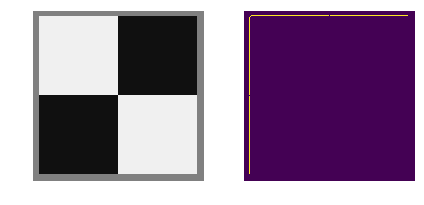

In [2]:
img = util.read_img('ps1-input0.png')
img_edges = cv2.Canny(img, 0, 0)
util.write_img('ps1-1-a-1.png', img_edges)

util.show_images_together(img, img_edges)

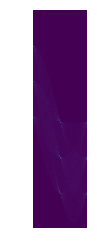

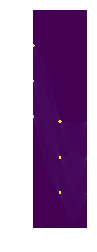

In [3]:
H, theta, rho = hough_lines_acc(img_edges)

def normalize_accumulator(acc, normalized_min, normalized_max):
    min_val = np.amin(acc)
    max_val = np.amax(acc)
    acc_range = max_val - min_val
    if acc_range == 0: return acc
    normalized_range = normalized_max - normalized_min
    return normalized_min + (acc - min_val) * normalized_range / acc_range
    
normal_hough_acc = normalize_accumulator(H, 0, 255).astype('uint8')

util.write_img('ps1-2-a-1.png', normal_hough_acc)
util.show_img(normal_hough_acc)

peaks = hough_peaks(normal_hough_acc, 10);
hough_peaks = normal_hough_acc.copy()
for peak in peaks:
    hough_peaks = cv2.circle(hough_peaks, tuple(peak), 5, (255,255,255), -1)

util.write_img('ps1-2-b-1.png', hough_peaks)
util.show_img(hough_peaks)